In [2]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from matplotlib import cm
from ipywidgets import interact, FloatSlider
import plotly.graph_objects as go

%matplotlib inline

%config InlineBackend.print_figure_kwargs = {'bbox_inches':None} 
%config InlineBackend.figure_format = 'retina'
%config InlineBackend.figure_figsize = (12,8)

In [4]:
x = np.linspace(-5,5,100)
X,Y = np.meshgrid(x,x)

In [5]:
mvn = scipy.stats.multivariate_normal(mean=[0,0], cov=np.array([[1,0.5], [0.5, 1]]))

In [6]:
z = mvn.pdf(np.stack([X,Y], axis=2))

interactive(children=(FloatSlider(value=270.0, description='azim', max=360.0, step=15.0), FloatSlider(value=35…

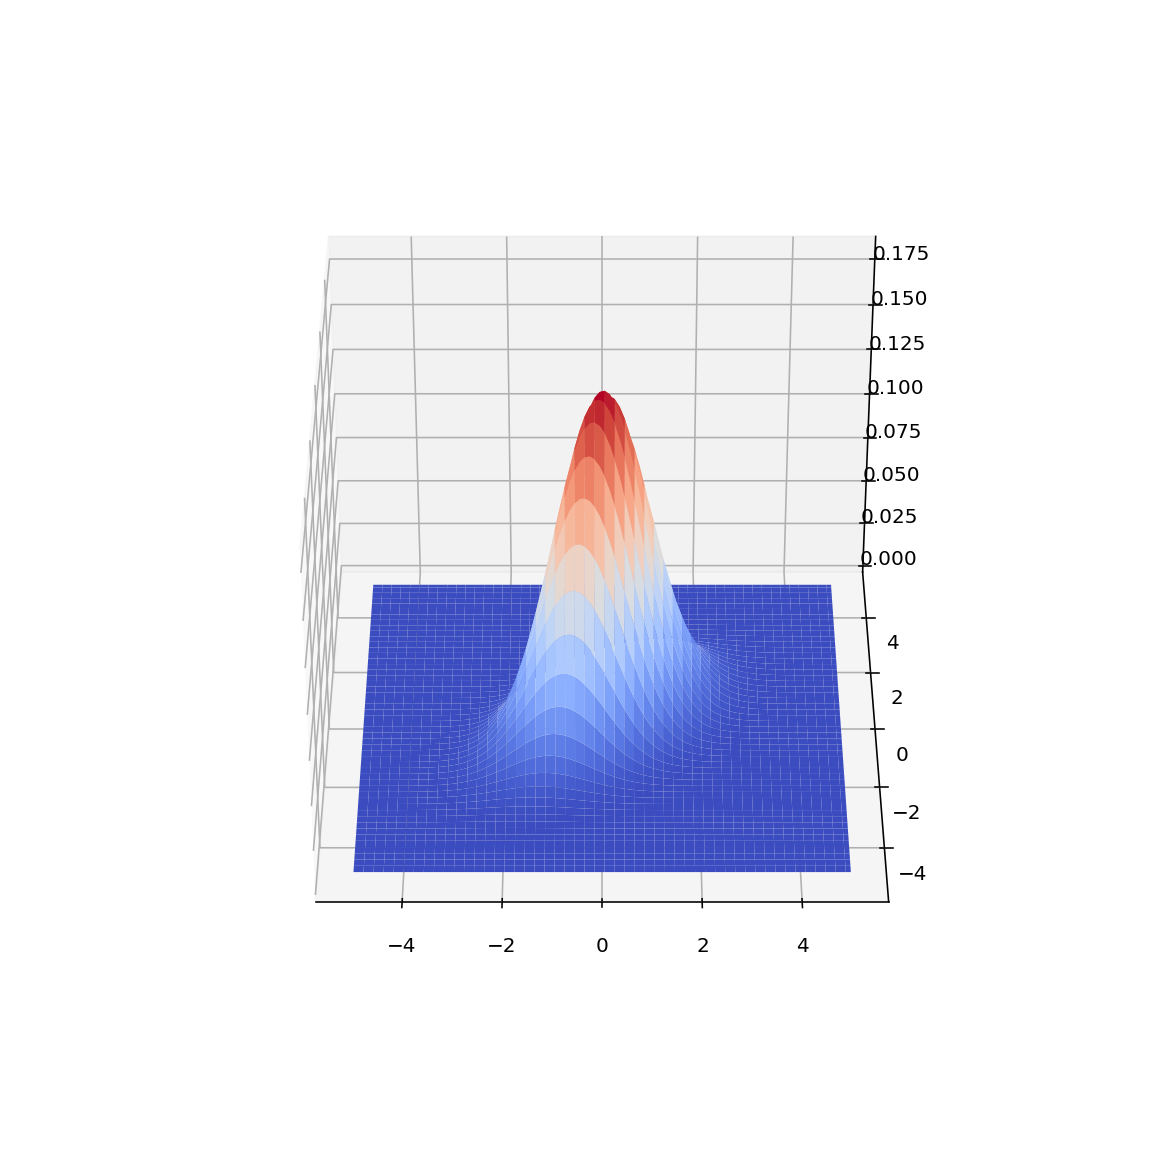

In [7]:
@interact(azim=FloatSlider(value=270, min=0, max=360, step=15), elev=FloatSlider(value=35, min=0, max=360, step=5))
def plot(azim=0, elev=0):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(azim=azim, elev=elev)
    ax.plot_surface(X,Y,z, cmap=cm.coolwarm)

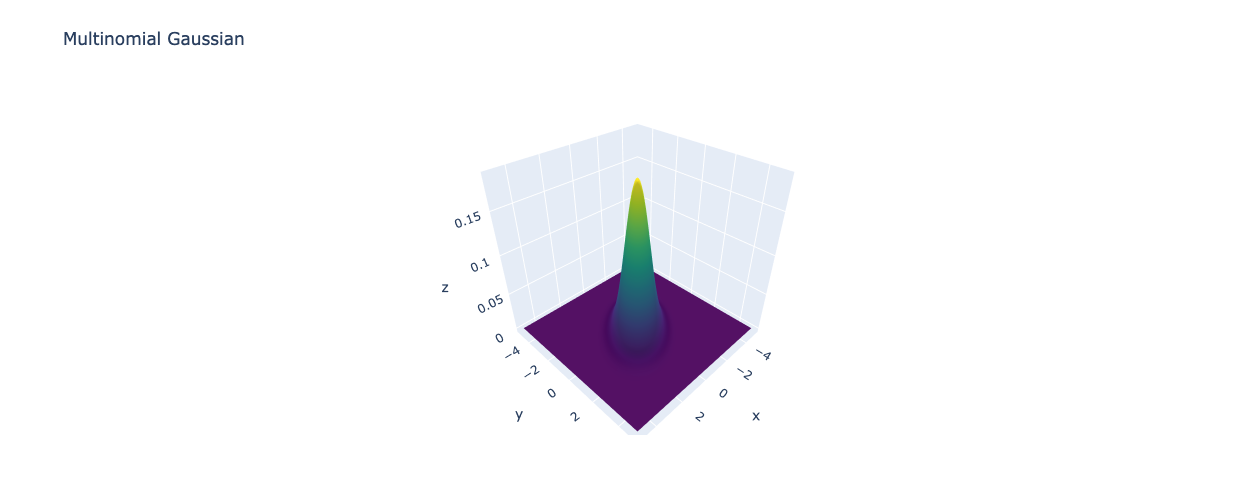

In [12]:
#z2 = np.ones_like(z) * 0.1
fig = go.Figure(data=[
        go.Surface(x=x, y=x, z=z, colorscale='Viridis', showscale=False),
        #go.Surface(x=x, y=x, z=z2, colorscale='Viridis', showscale=False),
    
])
fig.update_layout(title='Multinomial Gaussian', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()